# Finding the Max Sharpe Ratio Portfolio

In [1]:
%load_ext autoreload
%autoreload 2 
from sys import path 
path.append('../')
import edhec_risk_kit as erk
from scipy.optimize import minimize
import pandas as pd 
import numpy as np

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov()

In [2]:
def msr(riskfree_rate, er, cov):
    """
    RiskFree rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    # return_is_target = {'type': 'eq',
    #                     'args': (er,),
    #                     'fun': lambda weights, er: target_return - portfolio_return(weights,er)
    # }

    def neg_sharpe_ratio(weights, riskfree_rate, er, cov):
        """
        returns the negative of the sharpe ratio for a given set of weights
        """
        r = erk.portfolio_return(weights, er) 
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate) / vol


    weights = minimize(neg_sharpe_ratio, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

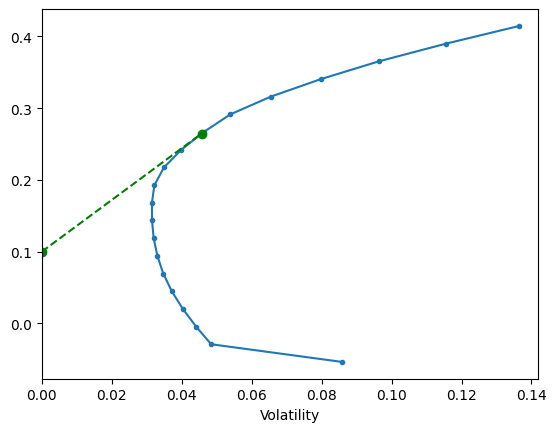

In [66]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
# add capital market line 
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed')


<Axes: xlabel='Volatility'>

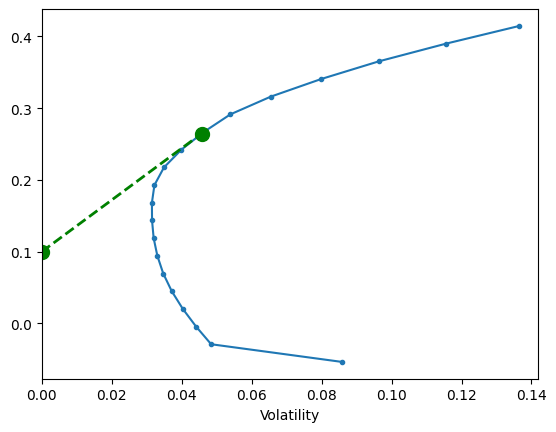

In [68]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)